In [9]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from cftime import DatetimeNoLeap

In [10]:
orig = xr.open_dataset('/dx02/janoski/cesm/inst_rf/forcing.TOA.4xCO2.inst.nc')
orig.FLNT

<xarray.DataArray 'FLNT' (time: 481, lat: 96, lon: 144)>
[6649344 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0003-01-01 00:00:00
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Net longwave flux at top of model

In [11]:
orig.time

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 2, 12, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 4, 1, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2, 12, 28, 23, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 12, 30, 11, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0003-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [18]:
# make dates we will interpolate to
dates = xr.cftime_range(start="0001-01-01 12:00:00",end="0002-12-31 12:00:00",freq='D',calendar='noleap')
new = orig.interp(time=dates,method='linear')

In [19]:
# create function for taking spatial averages, while weighting for latitude
def spatial_mean(ds_in, lat_bound_s = -91, lat_bound_n = 91):
    """
    Use xarray/numpy to calculate spatial average while weighting for latitude.
    
    Keyword arguments:
    ds_in -- Dataset or DataArray to take the average of
    lat_bound_s -- float, Southern boundary of area to average
    lat_bound_n -- float, Northern boundary of area to average
    """
    zonal = ds_in.mean(dim='lon').sel(lat=slice(lat_bound_s,lat_bound_n))
    weights = np.cos(np.deg2rad(zonal.lat)) / np.sum(np.cos(np.deg2rad(zonal.lat)))
    return((zonal * weights).sum(dim='lat'))

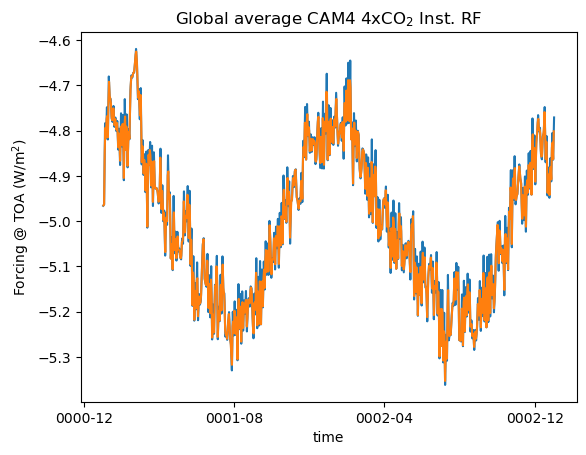

In [20]:
spatial_mean(orig.FLNT).plot()
spatial_mean(new.FLNT).plot()
plt.title('Global average CAM4 4xCO$_2$ Inst. RF')
plt.ylabel(r'Forcing @ TOA (W/m$^2$)')
plt.savefig('CAM4_4xCO2_TOA_RF_for_gabriel.jpg',dpi=300)
plt.show()

In [25]:
adj = xr.open_dataset('/dx02/janoski/cesm/strat_adj_rf/CAM5_RRTMG_strat_adj_RF.nc')

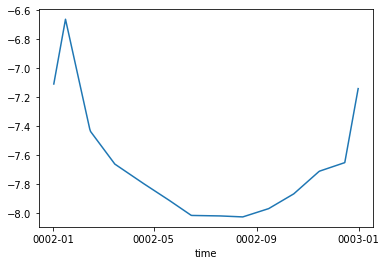

In [26]:
spatial_mean(adj.FLNT).plot()

In [8]:
co2_norm = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/'+
                           'norm_feedbacks/all/b40.1850.cam5-lens.01.glb_CO2.nc')

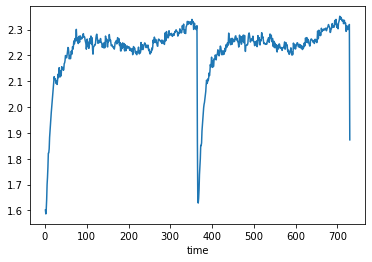

In [10]:
co2_norm.plot()